<a href="https://colab.research.google.com/github/LivingstonTardzenyuy/Deep-Learning-with-TensorFlow/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow Neural Networks

We will be predicting numerical variables based on some other variables

In [47]:
import tensorflow as tf
print(tf.__version__)

2.17.1


## creating some data to view and fit


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


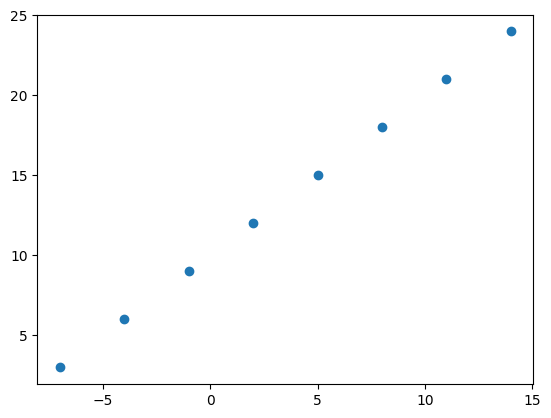

In [49]:
# Create features

X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

#Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#visualize
plt.scatter(X,y)

### Input and output shapes

In [50]:
# Create a demo tensor for housing predicting problem
house_info = tf.constant(['bedroom','bathroom','garage'])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [51]:
input_shape = X.shape
output_shape = y.shape

input_shape, output_shape

((8,), (8,))

In [52]:
X[0], y[0]

(-7.0, 3.0)

In [53]:
# Turn our Numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X = tf.expand_dims(X, axis=-1)
X, y

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [54]:
input_shape = X[0], X.shape
output_shape = y[0], y.shape

input_shape, output_shape

((<tf.Tensor: shape=(1,), dtype=float64, numpy=array([-7.])>,
  TensorShape([8, 1])),
 (<tf.Tensor: shape=(), dtype=float64, numpy=3.0>, TensorShape([8])))

## Steps in modelling with TensorFlow

1. Creating a model - define the input and output layers, as well as the hidden layers of of a deep learning model.
2. Compiling a model - define the loss function (the function that tells our function how wrong it is)
3. Evalution Matrix - What we can use to interpret the performance of our model.
4. Fitting our model - Letting model find patterns between X and y (features and labels)


In [55]:
# set the random seed.
tf.random.set_seed(42)

# 1. Create a model usig the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(
      loss = tf.keras.losses.mae, # mae is short for mean absolute error.
      optimizer = tf.keras.optimizers.SGD(),  # Stochastic gradient descent(SGD) helps to optimize our ML model
      metrics = ['mae'],
              )

# 3. Fit the model
model.fit(X, y, epochs=5)  # epochs defines how many times to go through the data

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step - loss: 21.8370 - mae: 21.8370
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 21.4438 - mae: 21.4438
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 21.0507 - mae: 21.0507
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 20.6576 - mae: 20.6576
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 20.3156 - mae: 20.3156


In [56]:
 # check out X and y
 X, y

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [57]:
# Making prediction using our model.
y_pred = model.predict(np.array([17.0]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


array([[-23.626554]], dtype=float32)

In [58]:
y_pred + 13

array([[-10.6265545]], dtype=float32)

## How to improve our model

We will improve our model using

1. **Creating a model** Add more layers,
increase each of the hidden layers.

2. **Compiling a model** - here we might change the optimization function or learning rate of the optimization function
3. **Fitting a model** - we might fit a model for more epochs(more training time)

In [59]:
# Let's rebuild our model
tf.random.set_seed(42)

#1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile our model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.01),
    metrics = ['mae']
)

#3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step - loss: 18.4970 - mae: 18.4970
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 18.2158 - mae: 18.2158
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 17.9345 - mae: 17.9345
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 17.6533 - mae: 17.6533
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 17.3720 - mae: 17.3720
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 17.0908 - mae: 17.0908
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 16.8095 - mae: 16.8095
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 16.5283 - mae: 16.5283
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 16.2470 - mae: 16.2470
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 15.9658 - mae: 15.9658
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - loss: 15.6845 - mae: 15.6845
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 15.4033 - mae: 15.4033
Epoch 13/100
1/1 ━━━━━

In [60]:
# our data
X, y

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [61]:
model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


array([[29.59302]], dtype=float32)

# Wowow our models looks really better now.

Let's try to change another paramter this time optimizer to see the effect

In [62]:

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ['mae']
)

model.fit(X, y, epochs=100)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 620ms/step - loss: 9.2652 - mae: 9.2652
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 9.2202 - mae: 9.2202
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 9.1752 - mae: 9.1752
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 9.1302 - mae: 9.1302
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 9.0852 - mae: 9.0852
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 9.0402 - mae: 9.0402
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 8.9952 - mae: 8.9952
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 8.9502 - mae: 8.9502
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 8.9052 - mae: 8.9052
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 8.8602 - mae: 8.8602
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 8.8152 - mae: 8.8152
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 8.7702 - mae: 8.7702
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/st

In [63]:
model.predict(np.array([17]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


array([[31.32106]], dtype=float32)

# Improving our model

We will increase the dense layers

In [64]:
# 1. Create the model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ['mae']
)

#3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 862ms/step - loss: 13.5622 - mae: 13.5622
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 12.6933 - mae: 12.6933
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 11.8281 - mae: 11.8281
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 10.9923 - mae: 10.9923
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 10.3461 - mae: 10.3461
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 9.6927 - mae: 9.6927
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 9.0230 - mae: 9.0230
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 8.3291 - mae: 8.3291
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 7.6115 - mae: 7.6115
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 6.8624 - mae: 6.8624
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 6.0798 - mae: 6.0798
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 5.2616 - mae: 5.2616
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [65]:
model.predict(np.array([17]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


array([[26.939642]], dtype=float32)

#Evaluting a model

In practice, a typical workflow you'll go through when building a neural network is:

Build th emodell -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model => fit it



When it comes to evaluation... there are 3 words to remaimber.

> Visualize, visualize, visualize

It's a good idea to visualize:
* The data
* the model itself - what does our model look like ?.
* The training of a model - how a model perform while it learns ?.
* The predictions of the model - how well does our model predict ?.

In [66]:
# Make a bigger dataset

X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [67]:
# Make labels for dataset

y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

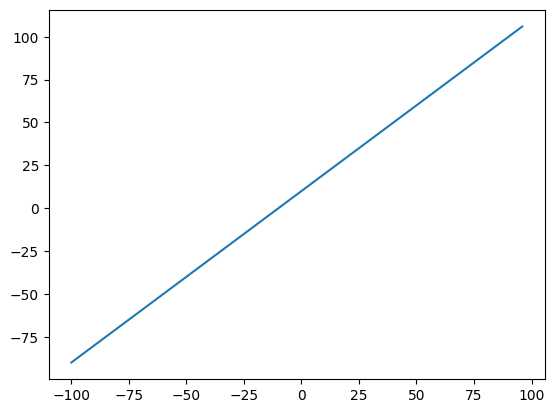

In [68]:
# Visualize the data
plt.plot(X, y)

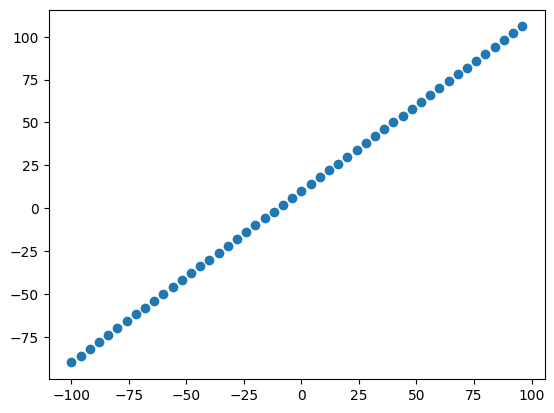

In [69]:
plt.scatter(X, y)

## We will split our data into

* **Training set** - The model learns from this data. We will use 70-80% of our data
* **Validation set** - The model gets tuned on this data. We will use 10% of our data.
* **Test set** - The model get evaluated on this data

In [70]:
len(X)

50

In [71]:
# Split the data into train and test sets.


X_train = X[:40]
y_train = y[:40]

# Reshape our X_train and X_test to have 2 dimensions
X_train = X_train.numpy().reshape(-1, 1)
X_test = X_test.numpy().reshape(-1,1)


X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

# Visualize our training data

Since we have gotton our training and test sets.... let's visualize it again!

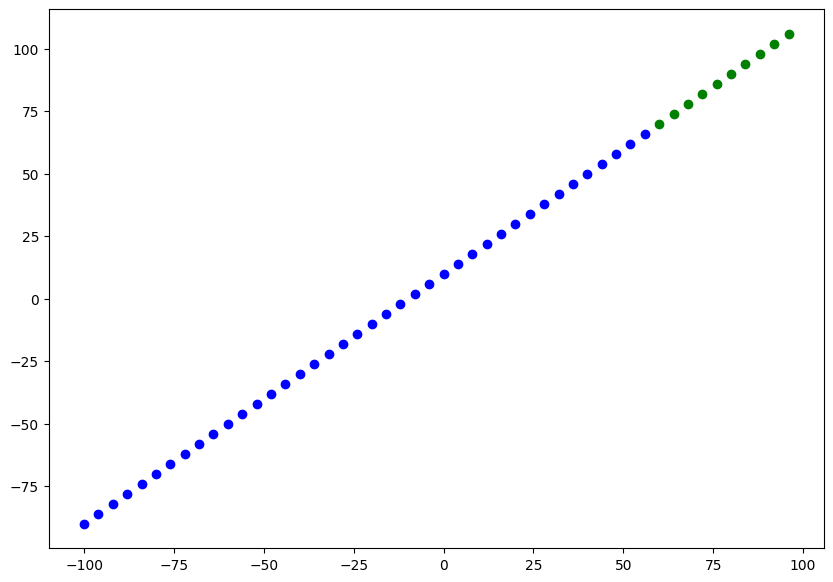

In [72]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c="b", label="Training data")

# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Test data")

In [75]:
# Let's have a look at how to build a neural network for our data.

#1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])


# 2. Compile our model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

# model.fit(X_train, y_train, epochs = 100)

In [76]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [89]:
 # Let's create a model that build automatically by defining the input_shape argument.

 tf.random.set_seed(42)

 # create a model
 model = tf.keras.Sequential([
     tf.keras.layers.Dense(10, input_shape=[1], name='input_layer'),
     tf.keras.layers.Dense(1, name='output_layer')
 ])

 # Compile our model
 model.compile(
     loss = tf.keras.losses.mae,
     optimizer = tf.keras.optimizers.SGD(),
     metrics = ['mae']
 )

In [90]:
model.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

In [91]:
* Total params - total number of parameters in the model
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainiable params = these parameters aren't updated during training.

SyntaxError: unterminated string literal (detected at line 3) (<ipython-input-91-3fcac140b1e6>, line 3)

In [92]:
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 53.3566 - mae: 53.3566 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 38.5721 - mae: 38.5721
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 19.3476 - mae: 19.3476 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 19.7761 - mae: 19.7761 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17.3732 - mae: 17.3732 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 16.1962 - mae: 16.1962 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 16.3701 - mae: 16.3701 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.9000 - mae: 11.9000 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14.8045 - mae: 14.8045 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 15.6991 - mae: 15.6991 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 11.8254 - mae: 11.8254 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 14.8164 - mae: 14.8164 
Epoch 13/100
2/2 ━━━━━━━

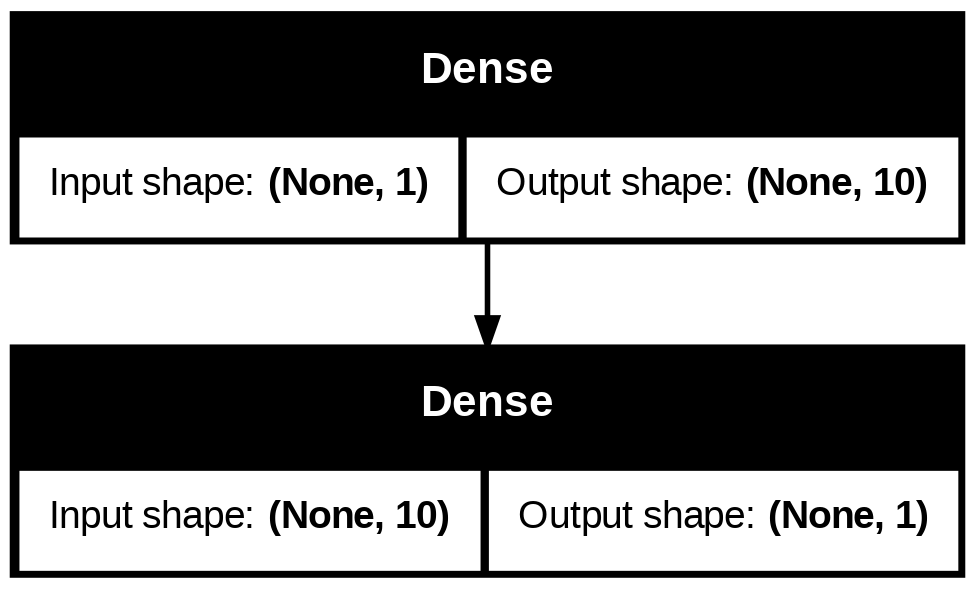

In [93]:
from tensorflow.keras.utils import plot_model
plot_model(model = model, show_shapes=True)


In [93]:
Ended in video 12   03 of zip folder 2